# K-means Clustering  

Using `digits` datasets in `sklearn`  

**Import libraries**  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# KMeans clustering 
from sklearn.cluster import KMeans

# Loading the digit dataset
from sklearn.datasets import load_digits

# Selecting k through silhoutte score
from sklearn.metrics import silhouette_score

# Normalization through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Pipeline
from sklearn.pipeline import Pipeline

In [3]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta

Some of the important parameters are as follows:  
* `init`  
* `n_init`  
* `max_iter`  
* `random_state`  

**Note**:  

Since `KMeans` algorithm is susceptible to local minima, we perform multiple `KMeans` fit and select the ones with the lowest value of sum of squared error.  
The total number of time, we would like to run KMeans algorithm is specified throught the `n_init` parameter.  
`max_iter` specifies the total number of iterations to perform before declaring the convergence.  

## Clustering of digits  

We use the `digits` datasets in `sklearn`.  

* It loads `8*8` digit images with approximately 180 samples per class.  
* From 10 classes, it has a total of 1797 images.  
* Each pixel has a value between 0 and 16.  

In [2]:
digits = load_digits()

Let's define parameters of KMeans clustering algorithm in a dictionary object:  

In [4]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 50,
        "max_iter": 500,
        "random_state": 0,
}

Let's define a `pipeline` with two stages:  

* preprocessing for feature scaling with `MinMaxScaler`.  
* clustering with `KMeans` clustering algorithm.  

In [5]:
pipeline = Pipeline([('preprocess', MinMaxScaler()),
                    ('clustering', KMeans(n_clusters=10, **kmeans_kwargs))])
pipeline.fit(digits.data)

Pipeline(steps=[('preprocess', MinMaxScaler()),
                ('clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

The cluster centroids can be accessed via `cluster_centers_` member variable of `KMeans` class.  

In [6]:
cluster_centers = pipeline[-1].cluster_centers_

Let's display cluster centroids:  

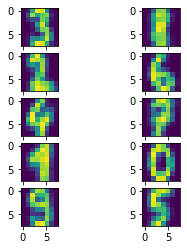

In [7]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i,j in zip(ax.flat, cluster_centers.reshape(10, 8, 8)):
    i.imshow(j)

In this case, the number of clusters were known. Hence we set `k=10` and got the clusters.  

For deciding the optimal number of clusters through elbow and silhoutte, we will pretend that we do not know the number of clusters in the data and we will try to discover the optimal number of clusters through these two methods one by one:  

### Elbow method  

Here we keep track of sum-of-squared error (SSE) in a list for each value of `k`.  

In [8]:
# Identifying the correct number of clusters
sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digit.append(kmeans.inertia_)

Note that the SSE for a given clustering output is obtainded through the `inertia_` member variable.   

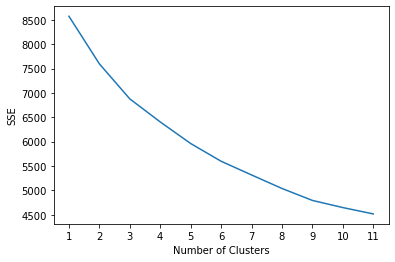

In [9]:
plt.plot(range(1, 12), sse_digit)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

There is a slight elbow at `k=9`, which could point to the fact that a few digits may have been merged in one cluster.  

### Silhoutte  

In [10]:
sil_coef_digits = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

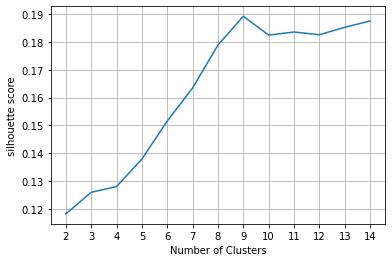

In [11]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.grid(True)
plt.show()

In [12]:
# get the value of k for which silhoutte coefficient is highest  
print(np.argmax(sil_coef_digits)+2)     #Adding 2 because the range starts from 2

9


This graph points the fact that n=9 and this could be because some of the digits like 1 and 7 may have striking similarity. 